In [ ]:
import os,sys,time
import json
from tqdm import tqdm

import torch
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
#データの読み込み

source_dir = os.path.abspath('../images_source')
target_dir = os.path.abspath('../images_target')
keypoint_file = os.path.abspath('../keypoints_source.json')
with open(keypoint_file, 'r') as f:
    keypoints_list = json.load(f)

In [13]:
keypoints_list[0]

{'filename': 'IXI002-Guys-0828_045.raw',
 'image_size': [256, 256],
 'keypoints': [{'id': 0, 'pixel': [212, 131]},
  {'id': 1, 'pixel': [183, 184]},
  {'id': 2, 'pixel': [75, 166]},
  {'id': 3, 'pixel': [61, 55]},
  {'id': 4, 'pixel': [165, 166]},
  {'id': 5, 'pixel': [125, 95]},
  {'id': 6, 'pixel': [104, 74]},
  {'id': 7, 'pixel': [45, 190]},
  {'id': 8, 'pixel': [167, 185]},
  {'id': 9, 'pixel': [180, 161]},
  {'id': 10, 'pixel': [43, 160]},
  {'id': 11, 'pixel': [106, 203]}]}

In [15]:
def load_image(fname,dir,image_size=[256,256]):
    with open(os.path.join(dir,fname), 'rb') as f:
        arr = np.fromfile(f, dtype=np.float64, count=image_size[0]*image_size[1])
        image = arr.reshape((image_size[0], image_size[1]))
        #image = (image-image.min())/(image.max() - image.min())*255
        return image

def load_images(fname,source_dir,target_dir,image_size=[256,256]):
    with open(os.path.join(source_dir,fname), 'rb') as f:
        arr = np.fromfile(f, dtype=np.float64, count=image_size[0]*image_size[1])
        image = arr.reshape((image_size[0], image_size[1]))    
        source_max = image.max()
        source_min = image[0,0]
        source_image = (image-source_min)/(source_max - source_min)*255
        
        #image = np.where(image<0,0,image)
        #image = np.where(image>255,255,image)
    f.close()
    #print(source_image)

    with open(os.path.join(target_dir,fname), 'rb') as f:
        arr = np.fromfile(f, dtype=np.float64, count=image_size[0]*image_size[1])
        image = arr.reshape((image_size[0], image_size[1]))    
        target_image = (image-source_min)/(image.max() - source_min)*255
        
        #image = np.where(image<0,0,image)
        #image = np.where(image>255,255,image)
    f.close()

    return source_image,target_image

def calc_point(keypoint,H):
    # keypoint:[N,2]
    #H : homography [3,3] ホモグラフィ行列
    N,_ = keypoint.shape
    keypoint = np.concatenate([keypoint,np.ones((N,1)).astype(np.uint8)],1)
    warped_point = np.dot(H,keypoint.T)
    warped_point = warped_point/warped_point[2]
    return warped_point[:2].T

In [19]:
for i,f in tqdm(enumerate(keypoints_list)):
    data = dict()
    fname = f["filename"]
    image_size = f["image_size"]
    data['filename'] = fname
    if fname[7:9]=='IO': #Gu,IO
        #画像の読み込み
        source_image,target_image = load_images(fname,source_dir,target_dir,image_size)
        print(f'{fname} source {source_image[0,0]},{source_image.max()} target {target_image[0,0]},{target_image.max()}')
    
    

2796it [00:00, 27841.61it/s]

IXI035-IOP-0873_048.raw source 0.0,255.0 target 0.0,246.8293601760218
IXI035-IOP-0873_051.raw source 0.0,255.0 target 0.0,234.85290261298755
IXI035-IOP-0873_054.raw source 0.0,255.0 target 0.0,236.4833698077521
IXI035-IOP-0873_057.raw source 0.0,255.0 target 0.0,228.21261841777647
IXI035-IOP-0873_060.raw source 0.0,255.0 target 0.0,213.2677992950931
IXI035-IOP-0873_063.raw source 0.0,255.0 target 0.0,235.27240438413156
IXI035-IOP-0873_066.raw source 0.0,255.0 target 0.0,231.63055626569064
IXI035-IOP-0873_069.raw source 0.0,255.0 target 0.0,244.6635285208054
IXI035-IOP-0873_072.raw source 0.0,255.0 target 0.0,234.91991361795414
IXI035-IOP-0873_075.raw source 0.0,255.0 target 0.0,237.98669952190446
IXI035-IOP-0873_078.raw source 0.0,255.0 target 0.0,233.40912143510164
IXI035-IOP-0873_081.raw source 0.0,255.0 target 0.0,229.5595847596724
IXI035-IOP-0873_084.raw source 0.0,255.0 target 0.0,228.6362202003859
IXI035-IOP-0873_087.raw source 0.0,255.0 target 0.0,234.59212787549185
IXI230-IOP-0

5581it [00:00, 5887.49it/s] 

IXI435-IOP-1040_066.raw source 0.0,255.0 target 0.0,236.02080944848032
IXI435-IOP-1040_069.raw source 0.0,255.0 target 0.0,244.33071866261616
IXI435-IOP-1040_072.raw source 0.0,255.0 target 0.0,250.243155896837
IXI435-IOP-1040_075.raw source 0.0,255.0 target 0.0,243.62428143871801
IXI435-IOP-1040_078.raw source 0.0,255.0 target 0.0,231.40813341809812
IXI435-IOP-1040_081.raw source 0.0,255.0 target 0.0,241.19527172681688
IXI435-IOP-1040_084.raw source 0.0,255.0 target 0.0,240.59151335685485
IXI435-IOP-1040_087.raw source 0.0,255.0 target 0.0,236.91329254137744
IXI442-IOP-1041_048.raw source 0.0,255.0 target 0.0,229.77144059061985
IXI442-IOP-1041_051.raw source 0.0,255.0 target 0.0,226.46093508495815
IXI442-IOP-1041_054.raw source 0.0,255.0 target 0.0,233.04576326913505
IXI442-IOP-1041_057.raw source 0.0,255.0 target 0.0,237.92455694925079
IXI442-IOP-1041_063.raw source 0.0,255.0 target 0.0,214.13475666246393
IXI442-IOP-1041_069.raw source 0.0,255.0 target 0.0,228.94688562940166
IXI442-I

6951it [00:01, 4975.93it/s]

IXI478-IOP-1142_072.raw source 0.0,255.0 target 0.0,230.47047576251208
IXI478-IOP-1142_075.raw source 0.0,255.0 target 0.0,235.40379651938986
IXI478-IOP-1142_078.raw source 0.0,255.0 target 0.0,239.77402065040212
IXI478-IOP-1142_081.raw source 0.0,255.0 target 0.0,219.2374525868975
IXI478-IOP-1142_084.raw source 0.0,255.0 target 0.0,246.40061144605667
IXI478-IOP-1142_087.raw source 0.0,255.0 target 0.0,229.37939229867968
IXI510-IOP-1143_048.raw source 0.0,255.0 target 0.0,226.44139977626443
IXI510-IOP-1143_051.raw source 0.0,255.0 target 0.0,239.52395976357195
IXI510-IOP-1143_054.raw source 0.0,255.0 target 0.0,228.47902990922893
IXI510-IOP-1143_057.raw source 0.0,255.0 target 0.0,222.43809255608525
IXI510-IOP-1143_060.raw source 0.0,255.0 target 0.0,251.12750798896167
IXI510-IOP-1143_063.raw source 0.0,255.0 target 0.0,235.65663445366047
IXI510-IOP-1143_066.raw source 0.0,255.0 target 0.0,236.80881119251399
IXI510-IOP-1143_069.raw source 0.0,255.0 target 0.0,235.19139613731116
IXI510-

7986it [00:01, 5992.14it/s]

IXI571-IOP-1154_051.raw source 0.0,255.0 target 0.0,249.29711942803368
IXI571-IOP-1154_054.raw source 0.0,255.0 target 0.0,229.24351568954575
IXI571-IOP-1154_057.raw source 0.0,255.0 target 0.0,241.63193619450513
IXI571-IOP-1154_060.raw source 0.0,255.0 target 0.0,236.03837011747495
IXI571-IOP-1154_063.raw source 0.0,255.0 target 0.0,239.53711609862165
IXI571-IOP-1154_066.raw source 0.0,255.0 target 0.0,241.74156601726872
IXI571-IOP-1154_069.raw source 0.0,255.0 target 0.0,221.48040865079687
IXI571-IOP-1154_072.raw source 0.0,255.0 target 0.0,230.61227645154773
IXI571-IOP-1154_075.raw source 0.0,255.0 target 0.0,240.8240089824985
IXI571-IOP-1154_078.raw source 0.0,255.0 target 0.0,239.84896442603485
IXI571-IOP-1154_081.raw source 0.0,255.0 target 0.0,231.042401040389
IXI571-IOP-1154_084.raw source 0.0,255.0 target 0.0,243.3613667032473
IXI571-IOP-1154_087.raw source 0.0,255.0 target 0.0,238.30280118360537
IXI573-IOP-1155_048.raw source 0.0,255.0 target 0.0,249.38038013741487
IXI573-IOP

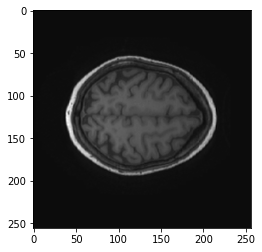

In [20]:
plt.imshow(source_image,cmap='gray')

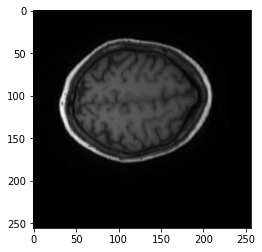

In [21]:
plt.imshow(target_image,cmap='gray')

10
1


In [29]:
akaze = cv.AKAZE_create()
bf = cv.BFMatcher()

#出力用のリスト
json_data = list()

for i,f in tqdm(enumerate(keypoints_list)):
    data = dict()
    fname = f["filename"]
    image_size = f["image_size"]
    data['filename'] = fname

    keypoint = list()
    #画像の読み込み
    source_image = load_image(fname,source_dir,image_size).astype(np.uint8)
    #source_image = cv.Laplacian(source_image, cv.CV_64F)
    target_image = load_image(fname,target_dir,image_size).astype(np.uint8)
    #target_image = cv.Laplacian(target_image, cv.CV_64F)
    #キーポイントの追加
    for j in range(len(f["keypoints"])):
        keypoint.append(f["keypoints"][j]["pixel"])
    keypoint = np.array(keypoint)

    kp1, des1 = akaze.detectAndCompute(source_image, None)
    ## keypoints_img = cv.drawKeypoints(source_image, kp, source_image)
    kp2, des2 = akaze.detectAndCompute(target_image, None)

    # 特徴量ベクトル同士をBrute-Force＆KNNでマッチング
    matches = bf.knnMatch(des1, des2, k=2)

    # 正しいマッチングのみ保持
    good_matches = []
    for m, n in matches:
        if m.distance < 0.9 * n.distance:
            good_matches.append([m])
    matches_img = cv.drawMatchesKnn(source_image,kp1,target_image,kp2,good_matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    # 適切なキーポイントを選択
    ref_matched_kpts = np.float32([kp1[m[0].queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    sensed_matched_kpts = np.float32([kp2[m[0].trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    if len(good_matches)<4:
        print(fname)
        break

    # ホモグラフィを計算
    H, status = cv.findHomography(ref_matched_kpts, sensed_matched_kpts, cv.RANSAC, 5.0)
    #print(H)
    if status is False:
        print(fname)

    #画像を変換
    warped_image = cv.warpPerspective(source_image, H, (target_image.shape[1], target_image.shape[0]))
    #キーポイントを計算
    warped_point = calc_point(keypoint,H)
    #出力用のリスト
    key_list = list()
    for k in range(len(warped_point)):
        key_list.append({"id":k,"pixel":warped_point[k].tolist()})
    #print(key_list)
    data["keypoints"] = key_list
    json_data.append(data)
    
print(json_data)
with open(os.path.join('../result/cv2_akaze','submission.json'), 'w') as f:
    json.dump(json_data, f, indent=0)
    

6723it [02:01, 55.32it/s]


In [8]:
fname

'IXI337-IOP-0929_069.raw'

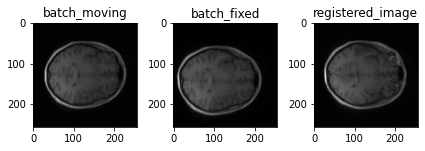

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(source_image,cmap='gray')
ax1.set_title('batch_moving')
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(target_image,cmap='gray')
ax2.set_title('batch_fixed')
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(warped_image,cmap='gray')
ax3.set_title('registered_image')
plt.tight_layout()